In [2]:
# Causal Questions for each dataset (Not definite) 

# IHDP - Does a young child with access to childcare and support have an
# higher chance of increased cognitive ability?

# Jobs - Does job training from NSWP increase a persons chances of becoming
# employed?

In [7]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

# Preprocessing
In this section, I will load the data, and interpret it's contents using a combination of graphs, and simple statistical measurements
### Loading the data

In [37]:
# IHDP Dataset
data = np.load('ihdp.npz')

# Jobs Dataset
data2 = np.load('jobs.npz')

### Data contents

In [38]:
# Column headers for data
# x --> Background Variables
# t --> Treatment Variable (Support or no support)
# yf --> Outcome Variable (Factual)
# ycf --> Outcome Variable (Counterfactual)
# ite --> individual treatment effect
for f in data.files:
  print(f'{f}: {data[f].shape}')

x: (747, 25)
t: (747, 1)
yf: (747, 1)
ycf: (747, 1)
ite: (747, 1)


In [39]:
# Column headers for data2
# x --> Background Variables
# t --> Treatment Variable (Training or no training)
# y --> Outcome Variable (Factual)
# e --> experimental or observational data
for f in data2.files:
  print(f'{f}: {data2[f].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


In [57]:
IHDP_x = data['x']
IHDP_t = data['t']
IHDP_yf = data['yf']
IHDP_ycf = data['ycf']
IHDP_ite = data['ite']

Jobs_x = data2['x']
Jobs_t = data2['t']
Jobs_y = data2['y']
Jobs_e = data2['e']
X = IHDP_x[:, 0]

### Data Modelling 
#### IHDP Dataset

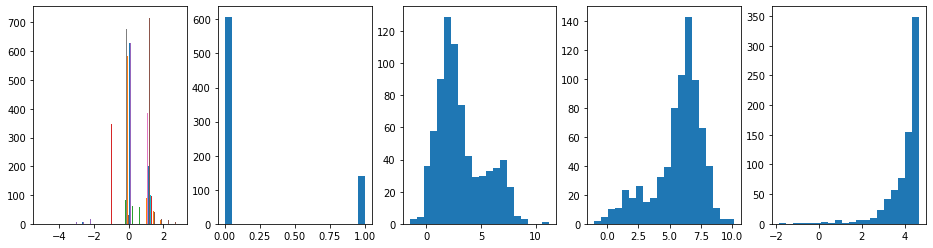

In [58]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
axs[0].hist(IHDP_x, bins=bins)
axs[1].hist(IHDP_t, bins=bins)
# Treatement is Binary (Support / No Support)
axs[2].hist(IHDP_yf, bins=bins)
axs[3].hist(IHDP_ycf, bins=bins)
axs[4].hist(IHDP_ite, bins=bins)
# ITE is majorly negatively skewed
plt.show()

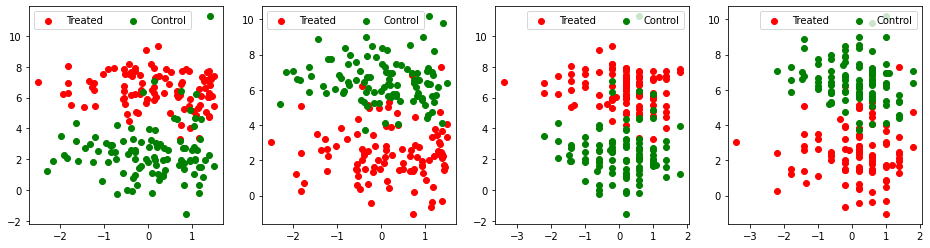

In [74]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
# These scatterplots have only been made via factual outcomes 
# More scatterplots could be made to model the counterfactual outcomes

axs[0].scatter(IHDP_x[:, 0].reshape(-1, 1)[IHDP_t == 1][:limit], IHDP_yf[IHDP_t == 1][:limit], c = "r", label = "Treated")
axs[0].scatter(IHDP_x[:, 0].reshape(-1, 1)[IHDP_t == 0][:limit], IHDP_yf[IHDP_t == 0][:limit], c = "g", label = "Control")

axs[1].scatter(IHDP_x[:, 0].reshape(-1, 1)[IHDP_t == 1][:limit], IHDP_ycf[IHDP_t == 1][:limit], c = "r", label = "Treated")
axs[1].scatter(IHDP_x[:, 0].reshape(-1, 1)[IHDP_t == 0][:limit], IHDP_ycf[IHDP_t == 0][:limit], c = "g", label = "Control")

axs[2].scatter(IHDP_x[:, 1].reshape(-1, 1)[IHDP_t == 1][:limit], IHDP_yf[IHDP_t == 1][:limit], c = "r", label = "Treated")
axs[2].scatter(IHDP_x[:, 1].reshape(-1, 1)[IHDP_t == 0][:limit], IHDP_yf[IHDP_t == 0][:limit], c = "g", label = "Control")

axs[3].scatter(IHDP_x[:, 1].reshape(-1, 1)[IHDP_t == 1][:limit], IHDP_ycf[IHDP_t == 1][:limit], c = "r", label = "Treated")
axs[3].scatter(IHDP_x[:, 1].reshape(-1, 1)[IHDP_t == 0][:limit], IHDP_ycf[IHDP_t == 0][:limit], c = "g", label = "Control")

axs[0].legend(ncol=2)
axs[1].legend(ncol=2)
axs[2].legend(ncol=2)
axs[3].legend(ncol=2)

#### Jobs Dataset

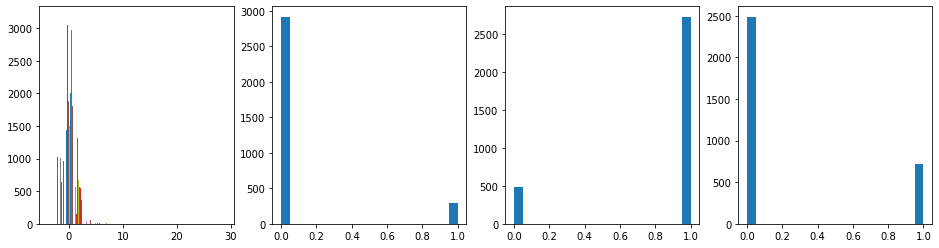

In [75]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(Jobs_x, bins=bins)
axs[1].hist(Jobs_t, bins=bins)
# Treatement is Binary (Trained / Untrained)
axs[2].hist(Jobs_y, bins=bins)
# Outcome is binary (Employed / Unemployed)
axs[3].hist(Jobs_e, bins=bins)
# Sample contents is binary (Experimental / Observational)
plt.show()

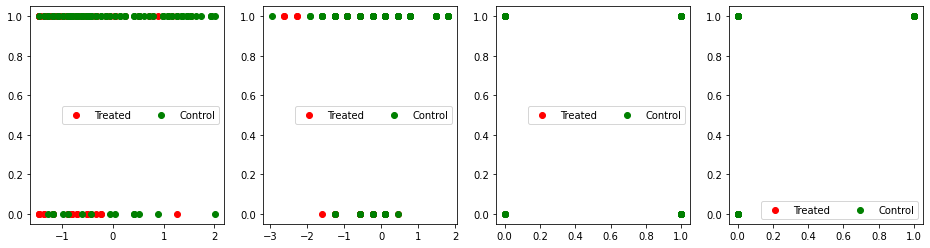

In [76]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].scatter(Jobs_x[:, 0].reshape(-1, 1)[Jobs_t == 1][:limit], Jobs_y[Jobs_t == 1][:limit], c = "r", label = "Treated")
axs[0].scatter(Jobs_x[:, 0].reshape(-1, 1)[Jobs_t == 0][:limit], Jobs_y[Jobs_t == 0][:limit], c = "g", label = "Control")

axs[1].scatter(Jobs_x[:, 1].reshape(-1, 1)[Jobs_t == 1][:limit], Jobs_y[Jobs_t == 1][:limit], c = "r", label = "Treated")
axs[1].scatter(Jobs_x[:, 1].reshape(-1, 1)[Jobs_t == 0][:limit], Jobs_y[Jobs_t == 0][:limit], c = "g", label = "Control")

axs[2].scatter(Jobs_x[:, 2].reshape(-1, 1)[Jobs_t == 1][:limit], Jobs_y[Jobs_t == 1][:limit], c = "r", label = "Treated")
axs[2].scatter(Jobs_x[:, 2].reshape(-1, 1)[Jobs_t == 0][:limit], Jobs_y[Jobs_t == 0][:limit], c = "g", label = "Control")

axs[3].scatter(Jobs_x[:, 3].reshape(-1, 1)[Jobs_t == 1][:limit], Jobs_y[Jobs_t == 1][:limit], c = "r", label = "Treated")
axs[3].scatter(Jobs_x[:, 3].reshape(-1, 1)[Jobs_t == 0][:limit], Jobs_y[Jobs_t == 0][:limit], c = "g", label = "Control")

axs[0].legend(ncol=2)
axs[1].legend(ncol=2)
axs[2].legend(ncol=2)
axs[3].legend(ncol=2)